# Alignment of modalities

## Modalities as they exist:
* Imagery
* Documents
* 


In [2]:
# 
from typing import Optional, List, Dict
from pathlib import Path
import os, sys

import geopandas as gpd
import pandas as pd

# Set up local test environment
PROJECT_PATH = Path(os.getcwd()).resolve().parent.parent
print(f'Treating "{PROJECT_PATH}" as `project_path`')
sys.path.append(str(PROJECT_PATH))

UNIVERSE_NAME = 'caprecon3'
UNIVERSE_PATH = PROJECT_PATH / 'src/streetTransformer/data/universes/' / UNIVERSE_NAME

Treating "/Users/jon/Documents/Employment/2025 VIDA Lab/streetTransformer" as `project_path`


## Setup

In [3]:
locations_gdf = gpd.read_feather(UNIVERSE_PATH / 'locations.feather').rename(columns={'NODEID':'location_id'})
locations_gdf

,location_id,geometry,StreetNames
0,2196,POINT (933671.717 134443.939),"[PHILIP AVE, AMBOY RD, ALBEE AVE]"
1,2198,POINT (933986.135 134580.324),"[AMBOY RD, ANNADALE RD]"
2,2258,POINT (934313.579 134957.373),"[ANNADALE RD, POILLON AVE]"
3,2259,POINT (934246.551 134504.402),"[AMBOY RD, COTTONTAIL CT]"
4,2267,POINT (934463.52 135150.49),"[FURMAN ST, ANNADALE RD, ELY CT]"
...,...,...,...
5337,9066652,POINT (1049106.447 198061.631),"[99 AVE, PEDESTRIAN TUNNEL]"
5338,9066653,POINT (1049078.112 198148.214),"[LIRR MAIN LINE, PEDESTRIAN TUNNEL]"
5339,9067013,POINT (993785.29 191933.947),[MYRTLE AVE]
5340,9067031,POINT (997535.312 191956.318),[WILLOUGHBY AVE]


In [4]:
## Load loactions class
#os.listdir('src/streetTransformer/data/universes/caprecon3/imagery')
from preprocessing.location import Location

test_location_gpdseries = locations_gdf.to_crs('4326').iloc[5]
test_location = Location(
    location_id = test_location_gpdseries['location_id'],
    universe_name = 'caprecon3',
    crossstreets = test_location_gpdseries['StreetNames'], # crossstreets
    centroid = test_location_gpdseries['geometry']
)

test_location.documents


# locations_gdf
gpd.read_file(UNIVERSE_PATH / 'documents.geojson')
# from shapely.geometry import Point
# bbox_p = Point(test_location.geometry.centroid_p).buffer(1000)
# documents_gdf_p = documents_gdf.to_crs(test_location.geometry.proj_crs)

Treating "/Users/jon/Documents/Employment/2025 VIDA Lab/streetTransformer" as `project_path`


Skipping field document_links: unsupported OGR type: 5
Skipping field document_links: unsupported OGR type: 5


,year,borough,name,source_url,project_id,full_paths,relative_paths,coords,geometry
0,2007,the Bronx,Bruckner-Sheridan Expressway Interchange Enhan...,https://www.nyc.gov/html/dot/html/about/projec...,0,[PosixPath('/Users/jon/Documents/Employment/20...,[PosixPath('/Users/jon/Documents/Employment/20...,"[(-73.882668084336, 40.822821717743)]",MULTIPOINT ((-73.88267 40.82282))
1,2007,the Bronx,Edgewater Road Traffic Calming,https://www.nyc.gov/html/dot/html/about/projec...,1,[PosixPath('/Users/jon/Documents/Employment/20...,[PosixPath('/Users/jon/Documents/Employment/20...,"[(-73.88337908444, 40.817349718838), (-73.8851...","MULTIPOINT ((-73.88338 40.81735), (-73.8851 40..."
2,2007,the Bronx,Lafayette Avenue Reengineering and Safety Impr...,https://www.nyc.gov/html/dot/html/about/projec...,2,[PosixPath('/Users/jon/Documents/Employment/20...,[PosixPath('/Users/jon/Documents/Employment/20...,"[(-73.859263591897, 40.821885717108), (-73.867...","MULTIPOINT ((-73.85926 40.82189), (-73.86766 4..."
3,2007,Brooklyn,9th Street Bicycle and Street Safety Project,https://www.nyc.gov/html/dot/html/about/projec...,3,[PosixPath('/Users/jon/Documents/Employment/20...,[PosixPath('/Users/jon/Documents/Employment/20...,"[(-73.989480055731, 40.730130739627), (-73.990...","MULTIPOINT ((-73.98948 40.73013), (-73.99051 4..."
4,2007,Brooklyn,Carlton Avenue Green Median and Bike Lanes,https://www.nyc.gov/html/dot/html/about/projec...,4,[PosixPath('/Users/jon/Documents/Employment/20...,[PosixPath('/Users/jon/Documents/Employment/20...,"[(-73.973487062904, 40.696245745707), (-73.972...","MULTIPOINT ((-73.97349 40.69625), (-73.97291 4..."
...,...,...,...,...,...,...,...,...,...
936,2025,Queens,Woodside Avenue Open Street,https://www.nyc.gov/html/dot/html/about/curren...,936,[PosixPath('/Users/jon/Documents/Employment/20...,[PosixPath('/Users/jon/Documents/Employment/20...,"[(-73.905577581683, 40.745394733698), (-73.900...","MULTIPOINT ((-73.90558 40.74539), (-73.90003 4..."
937,2025,Staten Island,"Father Capodanno Boulevard, Midland Avenue to ...",https://www.nyc.gov/html/dot/html/about/curren...,937,[PosixPath('/Users/jon/Documents/Employment/20...,[PosixPath('/Users/jon/Documents/Employment/20...,"[(-74.090275533115, 40.570785774432), (-74.092...","MULTIPOINT ((-74.09028 40.57079), (-74.09204 4..."
938,2025,Staten Island,"Lincoln Avenue, Father Capodanno Boulevard to ...",https://www.nyc.gov/html/dot/html/about/curren...,938,[PosixPath('/Users/jon/Documents/Employment/20...,[PosixPath('/Users/jon/Documents/Employment/20...,"[(-74.102245528975, 40.57598777383), (-74.1091...","MULTIPOINT ((-74.10225 40.57599), (-74.10911 4..."
939,2025,Staten Island,"Victory Boulevard, Bay Street to Wild Avenue",https://www.nyc.gov/html/dot/html/about/curren...,939,[PosixPath('/Users/jon/Documents/Employment/20...,[PosixPath('/Users/jon/Documents/Employment/20...,"[(-74.087139030405, 40.632237762251), (-74.076...","MULTIPOINT ((-74.08714 40.63224), (-74.07684 4..."


In [5]:
locations_gdf.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [6]:
from pydantic import BaseModel
from shapely.geometry import Point
from shapely.ops import transform
from pyproj import Proj, Transformer

class LocationGeometry(BaseModel):
    centroid: Point
    proj_crs: Proj
    bbox: 

    def proj_centroid(self):
        tf = Transformer.from_crs('EPSG:4326', self.proj_crs, always_xy=True)
        return transform(tf.transform, self.centroid)
    
class LocationImagery(BaseModel):
    tile_width: int
    centroid_tile: int
    tile_grid: List[int]
    image_paths: Dict[str, Path]

class LocationProject(BaseModel):
    name: str
    path: Path
    year: str
    borough: str

class LocationCityDataFeatures(BaseModel):
    pass

        



    


SyntaxError: invalid syntax (3986112365.py, line 9)

## Imagery
Gather all images

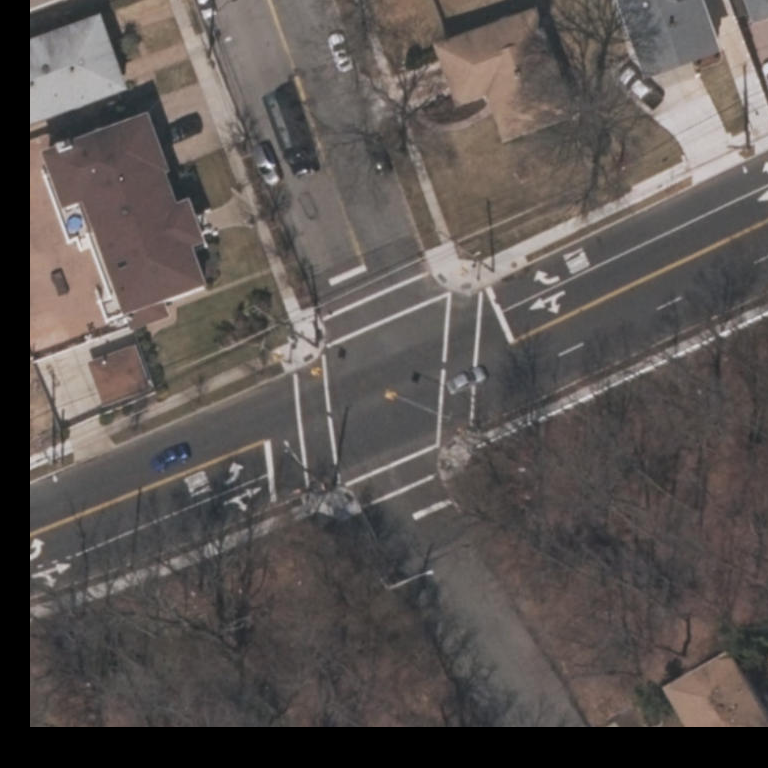

In [ ]:
from IPython.display import Image
YEARS = os.listdir(UNIVERSE_PATH / 'imagery')
def assemble_images_from_location_id(location_id:int, imagery_path=UNIVERSE_PATH / 'imagery', years=YEARS) -> List[Path]:
    #years_available = os.listdir(imagery_path)
    potential_paths = {year : imagery_path / year / f'{location_id}.png' for year in years}
    final_paths = {str(y): (path if path.exists() else None) for y, path in potential_paths.items() if path.exists}
    return final_paths


pd.Series(assemble_images_from_location_id(1))
#for file in assemble_images_from_location_id(1):

assemble_images_from_location_id(locations_gdf['location_id'][0])
Image(filename=assemble_images_from_location_id(locations_gdf['location_id'][0])['2014'])

## Documents

In [8]:
#import 
DOCS_GEOCODED_FILE =  '../../geocoded_from_census.csv'
#os.listdir('../../')
Path(DOCS_GEOCODED_FILE).exists()
#pd.read_json(Path(DOCS_GEOCODED_FILE), lines=True)
#pd.read_csv(DOCS_GEOCODED_FILE)

import pandas as pd
import json

def read_id_json_file_flat(
    filepath: str,
    *,
    keep_data_col: bool = False,
    json_sep: str = "__",
    make_geo: bool = False
) -> pd.DataFrame:
    """
    Read a 2-column text file with lines like:
        0, {"query": "...", "lat": 40.7, "lng": -73.9, "raw": {...}}
        1, null
        2, {"query": "...", "raw": {"coordinates": {"y": 40.7, "x": -73.9}}}

    Returns a DataFrame with flattened JSON fields as columns.
    If make_geo=True and geopandas is installed, returns a GeoDataFrame with geometry.

    Parameters
    ----------
    filepath : str
        Path to the file.
    keep_data_col : bool, default False
        If True, include the original parsed dict (or None) in a 'data' column.
    json_sep : str, default "__"
        Separator used when flattening nested JSON keys (via pandas.json_normalize).
    make_geo : bool, default False
        If True, construct a Point geometry from (lng, lat) and return a GeoDataFrame.

    Returns
    -------
    pandas.DataFrame or geopandas.GeoDataFrame
    """
    records = []
    with open(filepath, "r", encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if not line:
                continue  # skip empty lines
            # Split only on the first comma to preserve commas inside JSON
            try:
                id_str, json_str = line.split(",", 1)
            except ValueError:
                # Line without a comma; skip or raise depending on preference
                continue

            try:
                row_id = int(id_str.strip())
            except ValueError:
                # ID not an int; skip or handle as needed
                continue

            json_str = json_str.strip()
            if json_str.lower() == "null":
                data = None
            else:
                try:
                    data = json.loads(json_str)
                except json.JSONDecodeError:
                    data = None  # optionally: raise

            rec = {"id": row_id, "data": data}
            records.append(rec)

    if not records:
        return pd.DataFrame(columns=["id"])

    # Flatten JSON dicts (None -> {})
    flattened = pd.json_normalize(
        [r["data"] if isinstance(r["data"], dict) else {} for r in records],
        sep=json_sep,
        max_level=None
    )

    df = pd.DataFrame({"id": [r["id"] for r in records]})
    df = pd.concat([df, flattened], axis=1)

    # Optionally keep original parsed dict
    if keep_data_col:
        df["data"] = [r["data"] for r in records]

    # Ensure lat/lng columns exist even if only in raw.coordinates (y/x)
    # Prefer top-level lat/lng; otherwise fall back to raw__coordinates__y/x
    def _get_col(df, primary, fallback):
        if primary in df.columns:
            return df[primary]
        if fallback in df.columns:
            return df[fallback]
        return pd.Series([pd.NA] * len(df))

    lat = _get_col(df, "lat", f"raw{json_sep}coordinates{json_sep}y")
    lng = _get_col(df, "lng", f"raw{json_sep}coordinates{json_sep}x")

    # Add unified lat/lng columns if missing; don’t overwrite if already present
    if "lat" not in df.columns:
        df["lat"] = lat
    if "lng" not in df.columns:
        df["lng"] = lng

    # Optional: build geometry
    if make_geo:
        try:
            import geopandas as gpd
            from shapely.geometry import Point

            # Build Points, skipping rows without valid coords
            def mk_point(row):
                try:
                    if pd.notna(row["lng"]) and pd.notna(row["lat"]):
                        return Point(float(row["lng"]), float(row["lat"]))
                except Exception:
                    pass
                return None

            geometry = df.apply(mk_point, axis=1)
            gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")
            return gdf
        except ImportError:
            # Fall back to plain DataFrame if geopandas is not available
            pass

    return df


docs_geocoded_loaded = read_id_json_file_flat(DOCS_GEOCODED_FILE)

docs_geocoded_loaded[['raw__coordinates__x', 'raw__coordinates__y']]


,raw__coordinates__x,raw__coordinates__y
0,-73.911036,40.699531
1,-73.914852,40.701619
2,NaN,NaN
3,-73.915599,40.702042
4,-73.913327,40.700773
...,...,...
6475,-73.920963,40.773439
6476,-73.821617,40.614859
6477,-73.966656,40.591675
6478,-73.819052,40.609576


In [9]:
# now load the documents themselves
#[i for i in os.listdir(Path(PROJECT_PATH / '../proj_data/project_documents')) if Path(i).suffix == 'csv']
#[Path(i).suffix for i in os.listdir(Path(PROJECT_PATH / '../proj_data/project_documents/projects_df.csv'))]

PROJECT_DF_PATH = Path(PROJECT_PATH / '../proj_data/project_documents/projects_df.csv')
pd.read_csv(PROJECT_DF_PATH, index_col = 0)

# GEMINI_GEOCODED_DOCS 
GEMINI_GEOCODED_DOCS = PROJECT_PATH / 'data/project_documents/geocoded/gemini_output2.ndjson'

In [ ]:
import json
import pandas as pd
from typing import Union


In [ ]:
# gemini_geocoded_docs_df = load_gemini_geocoded_files(GEMINI_GEOCODED_DOCS)
# #docs_geocoded_from_gemini_and_census

# docs_geocoded_from_gemini_and_census = docs_geocoded_loaded[['lng','lat', 'query']]
# # gemini_geocoded_docs_df.merge(
# #     docs_geocoded_from_gemini_and_census, 
# # )

# docs_gemini_and_census_joined = gemini_geocoded_docs_df[['cross_streets', 'confidence','page_found','document_id']].merge(
#     docs_geocoded_from_gemini_and_census,  
#     left_index=True, right_index=True,
#     indicator=True
# )
# docs_gemini_and_census_joined.sample(10)[['cross_streets','query','']] #['_merge'].value_counts() # perfect


# docs_gemini_and_census_joined = docs_gemini_and_census_joined.rename(columns={'cross_streets': 'crossstreets_identified'})
# gdf_docs_gemini_and_census_joined = gpd.GeoDataFrame(
#     docs_gemini_and_census_joined,
#     geometry=gpd.points_from_xy(docs_gemini_and_census_joined['lng'], docs_gemini_and_census_joined['lat'])
# )
# #gdf_docs_gemini_and_census_joined['document_id'] = gdf_docs_gemini_and_census_joined['document_id'].astype('int')
# #gdf_docs_gemini_and_census_joined[gdf_docs_gemini_and_census_joined['document_id'].isna()]
# gdf_docs_gemini_and_census_joined['document_id'].isna().sum()
# gdf_docs_gemini_and_census_joined

docs_geocoded_loaded = read_id_json_file_flat('../../data/project_documents/geocoded_gemini_to_census.csv').rename(columns={'id':'project_id'})
documents_df = pd.read_csv('../../../proj_data/project_documents/projects_df.csv', index_col=0)#.reset_index(names='document_id')
documents_df.merge(
    docs_geocoded_loaded[['project_id','lng','lat','query']],
    left_index=True, right_on='project_id'   
)[['project_id','document_links']]
documents_df['project_id'] = documents_df.index.values

import ast
def generate_doc_full_paths(project_id:int, title:str, docs:List[str], base_path:Path):
    doc_full_paths = []

    for i in range(len(docs)):
        url = docs[i]
        stem = Path(url).stem
        folder = Path(f'{project_id}--{title}')
        file_name = f'{project_id}--{i}--{stem}.pdf'
        doc_full_paths.append(base_path / folder / file_name)
    
    return doc_full_paths#, doc_relative_paths

def generate_doc_relative_paths(project_id:int, title:str, docs:List[str], base_path:Path):
    doc_relative_paths = []

    for i in range(len(docs)):
        url = docs[i]
        stem = Path(url).stem
        folder = Path(f'{project_id}--{title}')
        file_name = f'{project_id}--{i}--{stem}.pdf'
        doc_relative_paths.append(base_path / folder / file_name)
    
    return doc_relative_paths

#full_paths, relative_paths = 
documents_df['full_paths'] = documents_df.apply(
    lambda x: generate_doc_full_paths(
        project_id=x['project_id'], 
        title=x['name'],
        docs=ast.literal_eval(x['document_links']),
        base_path=Path('../../../proj_data/project_documents/').resolve()
    ), 
    axis=1)

documents_df['relative_paths'] = documents_df.apply(
    lambda x: generate_doc_relative_paths(
        project_id=x['project_id'], 
        title=x['name'],
        docs=ast.literal_eval(x['document_links']),
        base_path=Path('../../../proj_data/project_documents/').resolve()
    ), 
    axis=1)


docs_geocoded_loaded['coord'] = docs_geocoded_loaded.apply(lambda x: (x['lng'], x['lat']), axis=1)

# Create a coords series while removing missing points
import math
coords = (
    docs_geocoded_loaded
    .groupby('project_id')['coord']
    .agg(lambda xs: [
        pt 
        for pt in xs 
        if not (isinstance(pt, tuple) 
                and all(math.isnan(v) for v in pt))
    ])
)

# merged_df = documents_df.merge(
#     docs_geocoded_loaded[['project_id','lng','lat','query']],
#     left_index=True, right_on='project_id',
#     how='left', indicator=True
# )#['_merge'].value_counts() # 322/6666
# merged_df

import numpy as np
documents_df['coords'] = coords
from shapely.geometry import MultiPoint
def safe_multipoint(points):
    try:
        return MultiPoint(points) # points must not have nulls in them
    except:
        return None
    
#MultiPoint(documents_df['coords'][2])
documents_gdf = gpd.GeoDataFrame(documents_df, geometry=documents_df['coords'].apply(safe_multipoint), crs='4326')
documents_gdf.drop(['document_links','source_url'], axis=1)
documents_gdf.drop(['document_links','source_url'], axis=1).to_file('../../src/streetTransformer/data/universes/caprecon3/documents.geojson')

#documents_df['coords'].map(safe_multipoint)
#gpd.read_file('../../src/streetTransformer/data/universes/caprecon3/documents.geojson')

# import xyzservices.providers as xyz
# from IPython.display import IFrame, HTML
#!jupyter trust document_alignment.ipynb
#m = documents_gdf.explore(tiles=xyz.CartoDB.Positron, output='iframe')
# #m.save('temp_map.html')
# #IFrame('temp_map.html', width=700, height=500)
# #HTML(m._repr_html_())

# import osmnx as ox
# nyc_bounds = ox.geocode_to_gdf('New York City, New York, USA')
# from IPython.display import IFrame
# # m = documents_gdf.clip(nyc_bounds).explore(backend='folium', tiles='OpenStreetMap')
# # m
# documents_gdf.clip(nyc_bounds).shape # 588
# documents_gdf[documents_gdf['geometry'].notna()].shape # 619 - 588/619
# documents_gdf

# test_location.documents





In [8]:
from preprocessing.location_imagery import LocationImagery
from pathlib import Path
from typing import Optional, Dict, List, Tuple
from pydantic import BaseModel, Field, field_validator
from mercantile import Tile, tile

# class LocationImagery(BaseModel):
#     coords: Tuple[float, float]
#     zlevel: int                   = 20 
#     centroid_tile: Optional[Tile] = None

#     def model_post_init(self, __context):
#         self.centroid_tile = tile(self.coords[0], self.coords[1], self.zlevel)


#LocationImagery(locations_gdf)
coord = locations_gdf.to_crs('4326')['geometry'][0]
temp_li = LocationImagery(coords=coord)
temp_li
#LocationImagery()
# #temp_li
# mercantile.tile(coord.x, coord.y, 20)

ImportError: cannot import name 'LocationImagery' from 'preprocessing.location_imagery' (/Users/jon/Documents/Employment/2025 VIDA Lab/streetTransformer/preprocessing/location_imagery.py)

## Final

In [ ]:


def assemble_modalities_from_location(location_id:int, unvierse_name:str='caprecon3', modalities=Optional[List[str]]):
    pass